In [1]:
# import required libraries
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dense,add
from keras.models import Sequential

2024-05-04 17:44:04.859044: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
# Load the dataset
df = pd.DataFrame(pd.read_csv("listing_data_publish.csv",nrows=5000))

# Specific columns to remove noisy values
columns = ["building_age","total_floor_count","floor_no","price","currency"]

# For removing NaN from the dataset
for i in df.columns:
    df[i] = df[i].fillna(0)

# For replacing some niosy data
for i in columns:
    for j in df[i]:
        if((len(str(j)) > 2) and (i not in ["price", "currency"])):
            df[i] = df[i].replace(j,0)
    if i == "price":
        df[i] = df[i].replace(0,round(df[i].mean(),2))
    if i == "currency":
        df[i] = df[i].replace(0,'TRY')

# Create a csv of Clean dataset
df.to_csv("Clean_listing_data_publish.csv",index=False,encoding='utf-8')

In [25]:

# importing that clean data csv
df = pd.DataFrame(pd.read_csv("Clean_listing_data_publish.csv"))

# Use labelEncorder to encode the columns
label = LabelEncoder()
for i in df.columns:
    df[i] = label.fit_transform(df[i])


# Setting the Feature and Target Columns
X = df.drop(columns=["price"])
y = df["price"]
y = np.reshape(y,(-1,1))

# Scaling the dataset
scaler = StandardScaler()
Xscaled_dataset = scaler.fit_transform(X)
yscaled_dataset = scaler.fit_transform(y)

# Train and test the df
random_int = random.randint(1, 20)
X_train,X_test,y_train,y_test = train_test_split(Xscaled_dataset,yscaled_dataset,test_size=0.3,random_state=random_int)

# Using linear model
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

# Print the accuracy of the model
accuracy_scikit = mean_squared_error(y_test,y_predict)
print(f'Accuracy: {round(accuracy_scikit*100)}%\nRandom number: {random_int}')

Accuracy: 70%
Random number: 15


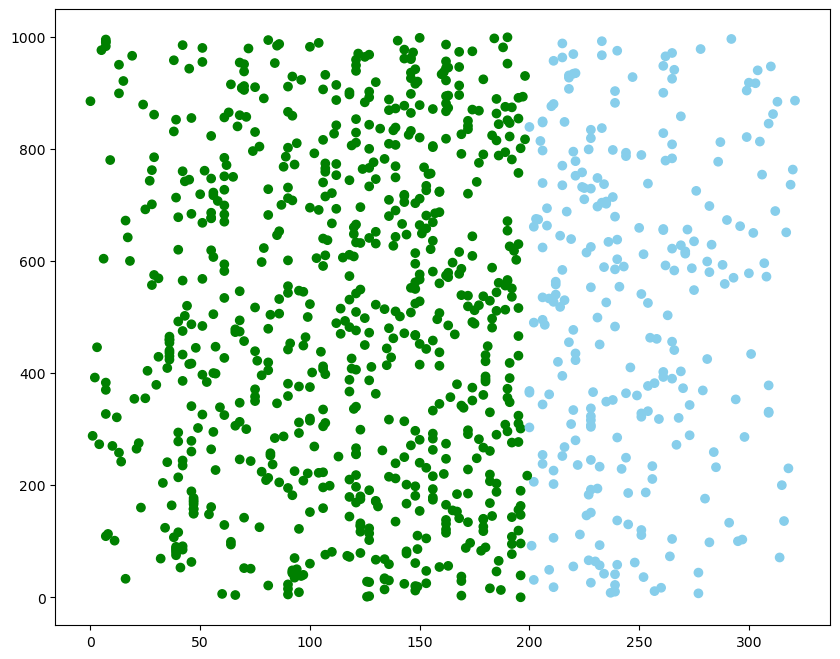

In [19]:
import matplotlib.pyplot as plt

colors = ['green' if price < 200 else 'skyblue' for price in df["price"]]

plt.figure(figsize=(10,8))
# Create scatter plot with different colors for each set of data points
plt.scatter(df["price"], df["listing_id"], c=colors)